In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
#sns.set_color_codes()
np.seterr(divide='raise')

Populating the interactive namespace from numpy and matplotlib


{'divide': 'ignore', 'invalid': 'ignore', 'over': 'ignore', 'under': 'ignore'}

In [2]:
%run ../GPclust/OMGP.py

In [3]:
df = pd.read_csv('../data/split_data_test.csv')
X = np.atleast_2d(df.x).T
Y = np.atleast_2d(df.y).T

In [4]:
m = OMGP(X, Y, K=2, prior_Z='symmetric')
m.s2 = 0.5  # Model variance
m.hyperparam_interval = 3  # Frequency of hyperparameter optimizations

print m.log_likelihood()

[[-252.68402566]]


In [5]:
m

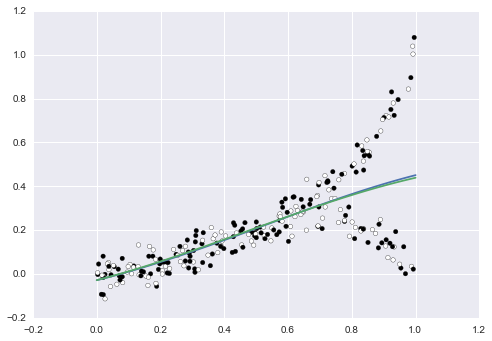

In [6]:
# Before optimization

XX = np.atleast_2d(np.linspace(0,1)).T

YY = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=np.argmax(m.phi, 1));
for i in range(m.phi.shape[1]):
    plt.plot(XX, YY[:, i]);

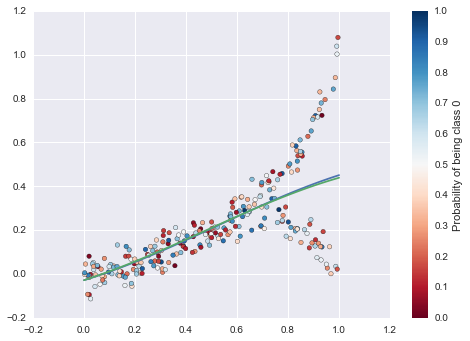

In [7]:
YY = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=(m.phi[:,0]), cmap=cm.RdBu, vmin=0., vmax=1.);
cb = plt.colorbar()
cb.set_label('Probability of being class 0')
for i in range(m.phi.shape[1]):
    plt.plot(XX, YY[:, i]);

In [8]:
m.s2 = 0.01
m.fix()

array([0, 1, 2, 3])

In [9]:
m.optimize(step_length=0.1, method='steepest')

iteration 440 bound=[[ 1119.89102154]] grad=421.118941089, beta=0

KeyboardInterrupt: 

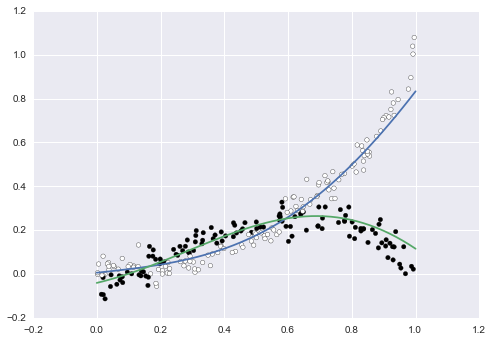

In [11]:
# After optimization

XX = np.atleast_2d(np.linspace(0,1)).T

YY = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=np.argmax(m.phi, 1));
for i in range(m.phi.shape[1]):
    plt.plot(XX, YY[:, i]);

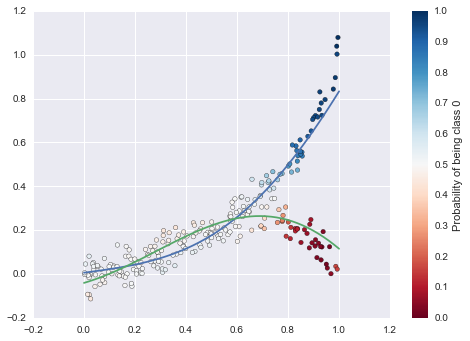

In [12]:
YY = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=(m.phi[:,0]), cmap=cm.RdBu, vmin=0., vmax=1.);
cb = plt.colorbar()
cb.set_label('Probability of being class 0')
for i in range(m.phi.shape[1]):
    plt.plot(XX, YY[:, i]);

In [13]:
m

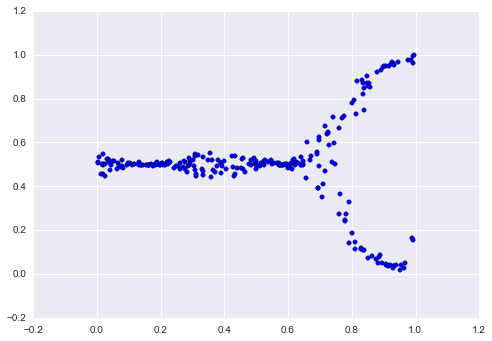

In [14]:
plt.scatter(m.X, m.phi[:,0]);